# Radiation and Planetary Temperature

*Paul O. Hayne*

Planetary temperatures are determined by the balance of energy sources and losses. On jovian planets, interior heat flow may be significant. For the surfaces and atmospheres of terrestrial planets and small bodies, the dominant energy source is absorbed **solar radiation** from the Sun (or star), and the dominant way these planets lose energy is by **thermal emission** of infrared radiation. Atmospheres absorb, scatter, and emit both solar and infrared radiation. Surface temperatures can be strongly affected by the way the atmosphere modifies the incoming and outgoing radiation. We first review some basic properties of radiation, particularly the interaction of light with matter. Then, we discuss how radiation controls planetary temperatures.

## Properties of Radiation

### Fundamentals

Most of the information we gather about planetary atmospheres comes from measuring the light they emit and reflect. Light is another word for *electromagnetic radiation*, which behaves as both a particle and a wave. A beam of light is made of fundamental particles (or *quanta*) called *photons*, which travel through space with constant speed, $c = 3\times 10^8~\mathrm{m~s^{-1}}$. Because of its wave-like nature, each photon has a *frequency*, $\nu$, and a wavelength $\lambda = c/\nu$. On the other hand, because of its particle-like nature, each photon also has well-defined energy, $E = h\nu = hc/\lambda$. The factor $h = 6.6\times 10^{-34}~\mathrm{m^2~kg~s^{-1}}$ is called Planck's constant. Shorter wavelength photons have higher frequencies and higher energies. We can determine the physical properties of planetary surfaces and atmospheres (e.g., composition, temperature, density) by measuring their **spectra**, which is just the variation of intensity across the electromagnetic spectrum. This technique is called **spectroscopy**, which is typically applied to planets by using **remote sensing** observations from spacecraft.

### Interaction of light with matter

Radiation is exchanged with matter through **emission**, **absorption**, and **scattering** of photons. Emission occurs when a particle transitions from a higher to a lower energy state, producing a photon through *spontaneous emission* in order to conserve energy. Absorption is the reverse of this process, when a photon excites a particle to a higher energy state. These energy states are determined by the vibration and rotation of atoms and molecules, as well as the orbitals of their bound electrons. Energy states exist in discrete levels, which can appear as absorption or emission lines in planetary spectra. Often, these spectral lines are superposed on a broad **blackbody spectrum**, which represents the conversion of thermal energy to electromagnetic radiation. Blackbody emission is described by the Planck function, which gives the spectral radiance ($\mathrm{W~m^{-2}~sr^{-1}~\mu m^{-1}}$) at a given temperature $T$ and wavelength $\lambda$:

\begin{align}
    B_\lambda (\lambda, T) = \frac{2hc^2}{\lambda^5}\frac{1}{e^{\frac{hc}{\lambda k_\mathrm{B}T}}-1}
\end{align}

This is also known as the **spectral energy distribution**. Solid angle has units of steradians (sr), and is just a measure of angular size in 2-d space. A [similar form](http://www.spectralcalc.com/blackbody/planck_blackbody.html) of the Planck function gives the intensity of radiation in terms of the frequency, $\nu$. **Spectral emissivity**, $\epsilon_\lambda$ represents the efficiency of emission with respect to each wavelength, $\lambda$. The spectral radiance is given by $I(\lambda,T) = \epsilon_\lambda B_\lambda(\lambda,T)$. Measuring the emission spectrum to derive $\epsilon_\lambda$ is a common way to investigate the composition of a planetary body.

**Wien's Law** is a useful way to find the peak of a blackbody emission curve: $\lambda_\mathrm{peak} \sim (2900/T)~\mu$m, where the temperature is in kelvins. Note that the colder the body, the longer the wavelength of its peak emission. For example, the Sun's $\sim5800~\mathrm{K}$ emission peaks near 0.5 $\mu$m, whereas Earth ($T \sim 288~\mathrm{K}$) has a spectral energy distribution with a peak near 10 $\mu$m (Fig. 3.1).

---

In [1]:
# Toggle code on/off
from IPython.display import HTML
# This script provides a button to toggle display code on/off
HTML('''<script> code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Toggle code on/off"></form>''')

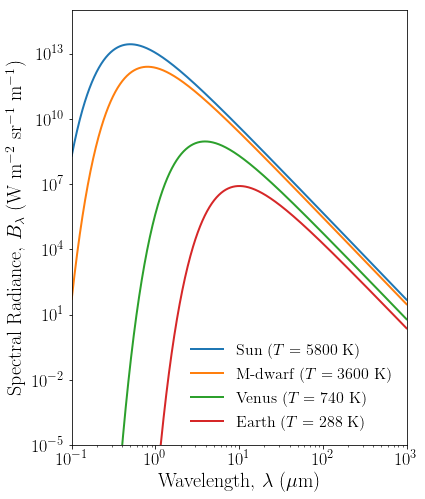

In [23]:
# Blackbody emission: examples
import numpy as np
import matplotlib.pyplot as plt
import planetRad as pr
import prettyPlots as pp
pp.setStyle()

T1 = 5800.0 # Sun
T2 = 3600.0 # M-dwarf star
T3 = 740.0 # Venus
T4 = 288.0 # Earth

# Wavelength
lam = np.logspace(-1,3,1000)*1e-6 # [meters]

# Planck function
B1 = pr.planck(T1,lam)
B2 = pr.planck(T2,lam)
B3 = pr.planck(T3,lam)
B4 = pr.planck(T4,lam)

# plot
plt.figure(figsize=[6,8])
plt.loglog(lam*1e6, B1, label='Sun ($T = 5800~\mathrm{K}$)')
plt.loglog(lam*1e6, B2, label='M-dwarf ($T = 3600~\mathrm{K}$)')
plt.loglog(lam*1e6, B3, label='Venus ($T = 740~\mathrm{K}$)')
plt.loglog(lam*1e6, B4, label='Earth ($T = 288~\mathrm{K}$)')
plt.ylim([1e-5,1e15])
plt.xlim(np.array([np.min(lam), np.max(lam)])*1e6)
plt.xlabel('Wavelength, $\lambda$ ($\mu$m)')
plt.ylabel('Spectral Radiance, $B_\lambda$ ($\mathrm{W~m^{-2}~sr^{-1}~m^{-1}}$) ')
plt.legend(frameon=False)
plt.show()

**Figure 3.1:** Blackbody emission curves for several different astronomical objects.

---

### Radiant flux

The intensity of radiation is expressed in terms of **flux**, with units of $\mathrm{W~m^{-2} = J~m^{-2}~s^{-1}}$. Flux therefore measures the rate of energy loss/gain per unit area. To find the flux emitted by a blackbody, we integrate the spectral radiance over all wavelengths, and multiply by the solid angle of the hemisphere ($=\pi$) over which the body radiates: 

\begin{align}
    F(T) = \pi \int_0^\infty B_\lambda(\lambda,T)~d\lambda = \sigma T^4
\end{align}

Although planetary surfaces and atmospheres are never perfect blackbodies, they are often very close, so we use $\sigma T^4$ as an approximation of their thermal emission. The Sun itself is very close to a perfect blackbody at $T \sim 5800~\mathrm{K}$. Real physical objects are less efficient than blackbodies, so we use the symbol $\epsilon$ to represent their **emissivity**, or efficiency (integrated over all wavelengths) relative to a blackbody:

\begin{align}
    F(T) = \epsilon \sigma T^4
\end{align}

The fact that the spectral energy distributions of the Sun and planets are separated in wavelength is useful, because we can usually treat them separately (Fig. 3.2).

---

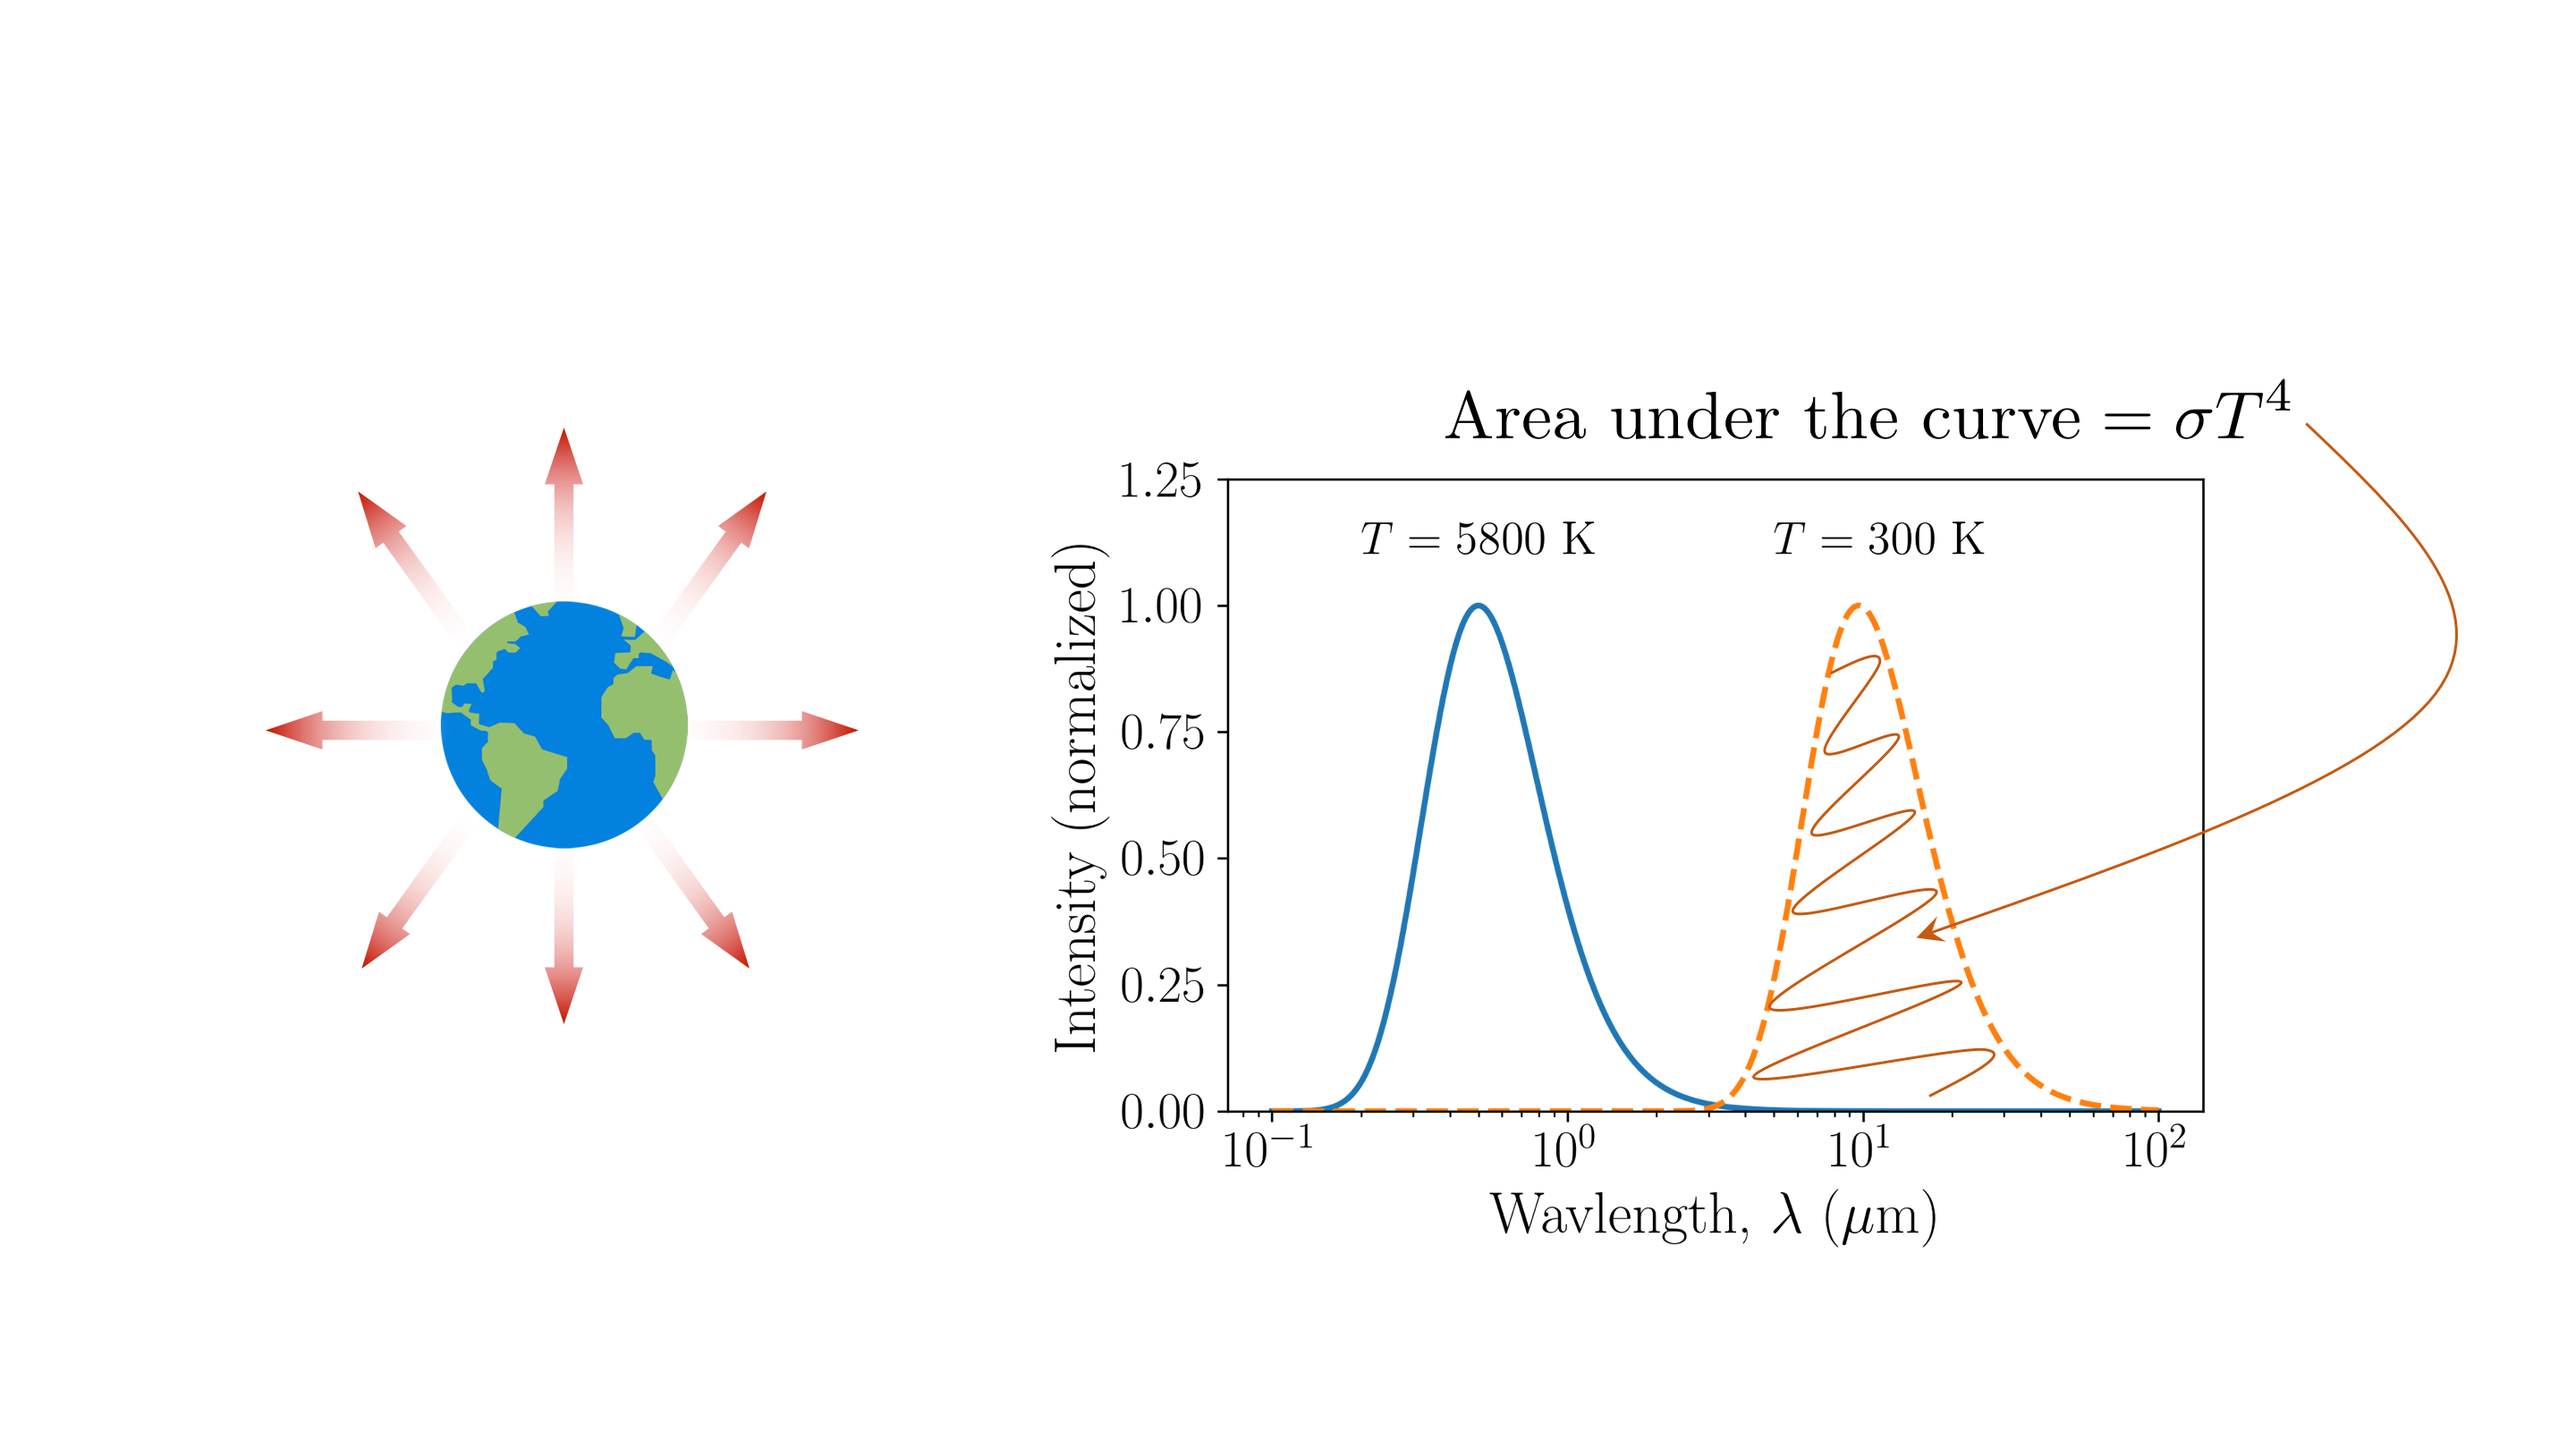

In [6]:
# Display Figure
from IPython.display import Image
Image(filename='/Users/paha3326/main/Teaching/ASTR3720/hayne/notes/blackbody_curves_planetary-emission.png', width=600)

**Figure 3.2:** Planetary thermal emission can be estimated using the Stefan-Boltzmann law: Power radiated is proportional to surface area times $\sigma T^4$, which is the integral of the Planck radiance. The two blackbody curves show examples for the Sun (left) and a planet like Earth (right), normalized to their maximum intensities.

---

## Temperatures of Planets

Generally the host star (Sun, in our case) provides the dominant source of energy to planetary atmospheres and surfaces. Stars emit radiation almost like blackbody emitters, which means that their **spectral energy distribution** can be accurately described by the Planck function. The emitted power from the Sun is called its **luminosity**, and is given by

\begin{align}
    \mathrm{Luminosity} &= \mathrm{(Emitted~Flux)\times(Surface~Area)} \\
                        &= (\sigma T_\odot^4) \times (4\pi R_\odot^2) \\
                        &[=]~\mathrm{J~s^{-1}} \\
                        &[=]~\mathrm{Watts}
\end{align}

As the radiation from the star expands into space, it is spread over a larger and larger surface area. We can represent this as a series of "shells" (Fig. 3.3). At a distance $r$, the same amount of radiation is spread over an area $4\pi r^2$, so the intensity is

\begin{align}
    \mathrm{Received~Flux} &= \mathrm{\frac{Luminosity}{Area~of~shell}} \\
                           \\
                           &= \frac{\mathrm{(Emitted~Flux)\times(Area~of~Sun)}}{4\pi r^2} \\
                           \\
                           &= \frac{\sigma T_\odot^4 4\pi R_\odot^2}{4\pi r^2} \\
                           &= \sigma T_\odot^4 \left(\frac{R_\odot}{r}\right)^2 \\
                           &= S_\odot\left(\frac{\mathrm{1~AU}}{r_\mathrm{AU}}\right)^2 \equiv F_\odot
\end{align}

The quantity $S_\odot \approx 1361~\mathrm{W~m^{-2}}$ is called the **solar constant**, and gives the average **insolation** (solar radiant flux) at 1 AU. The formula on the last line above uses the distance to the Sun in AU, which we call $r_\mathrm{AU}$.

---

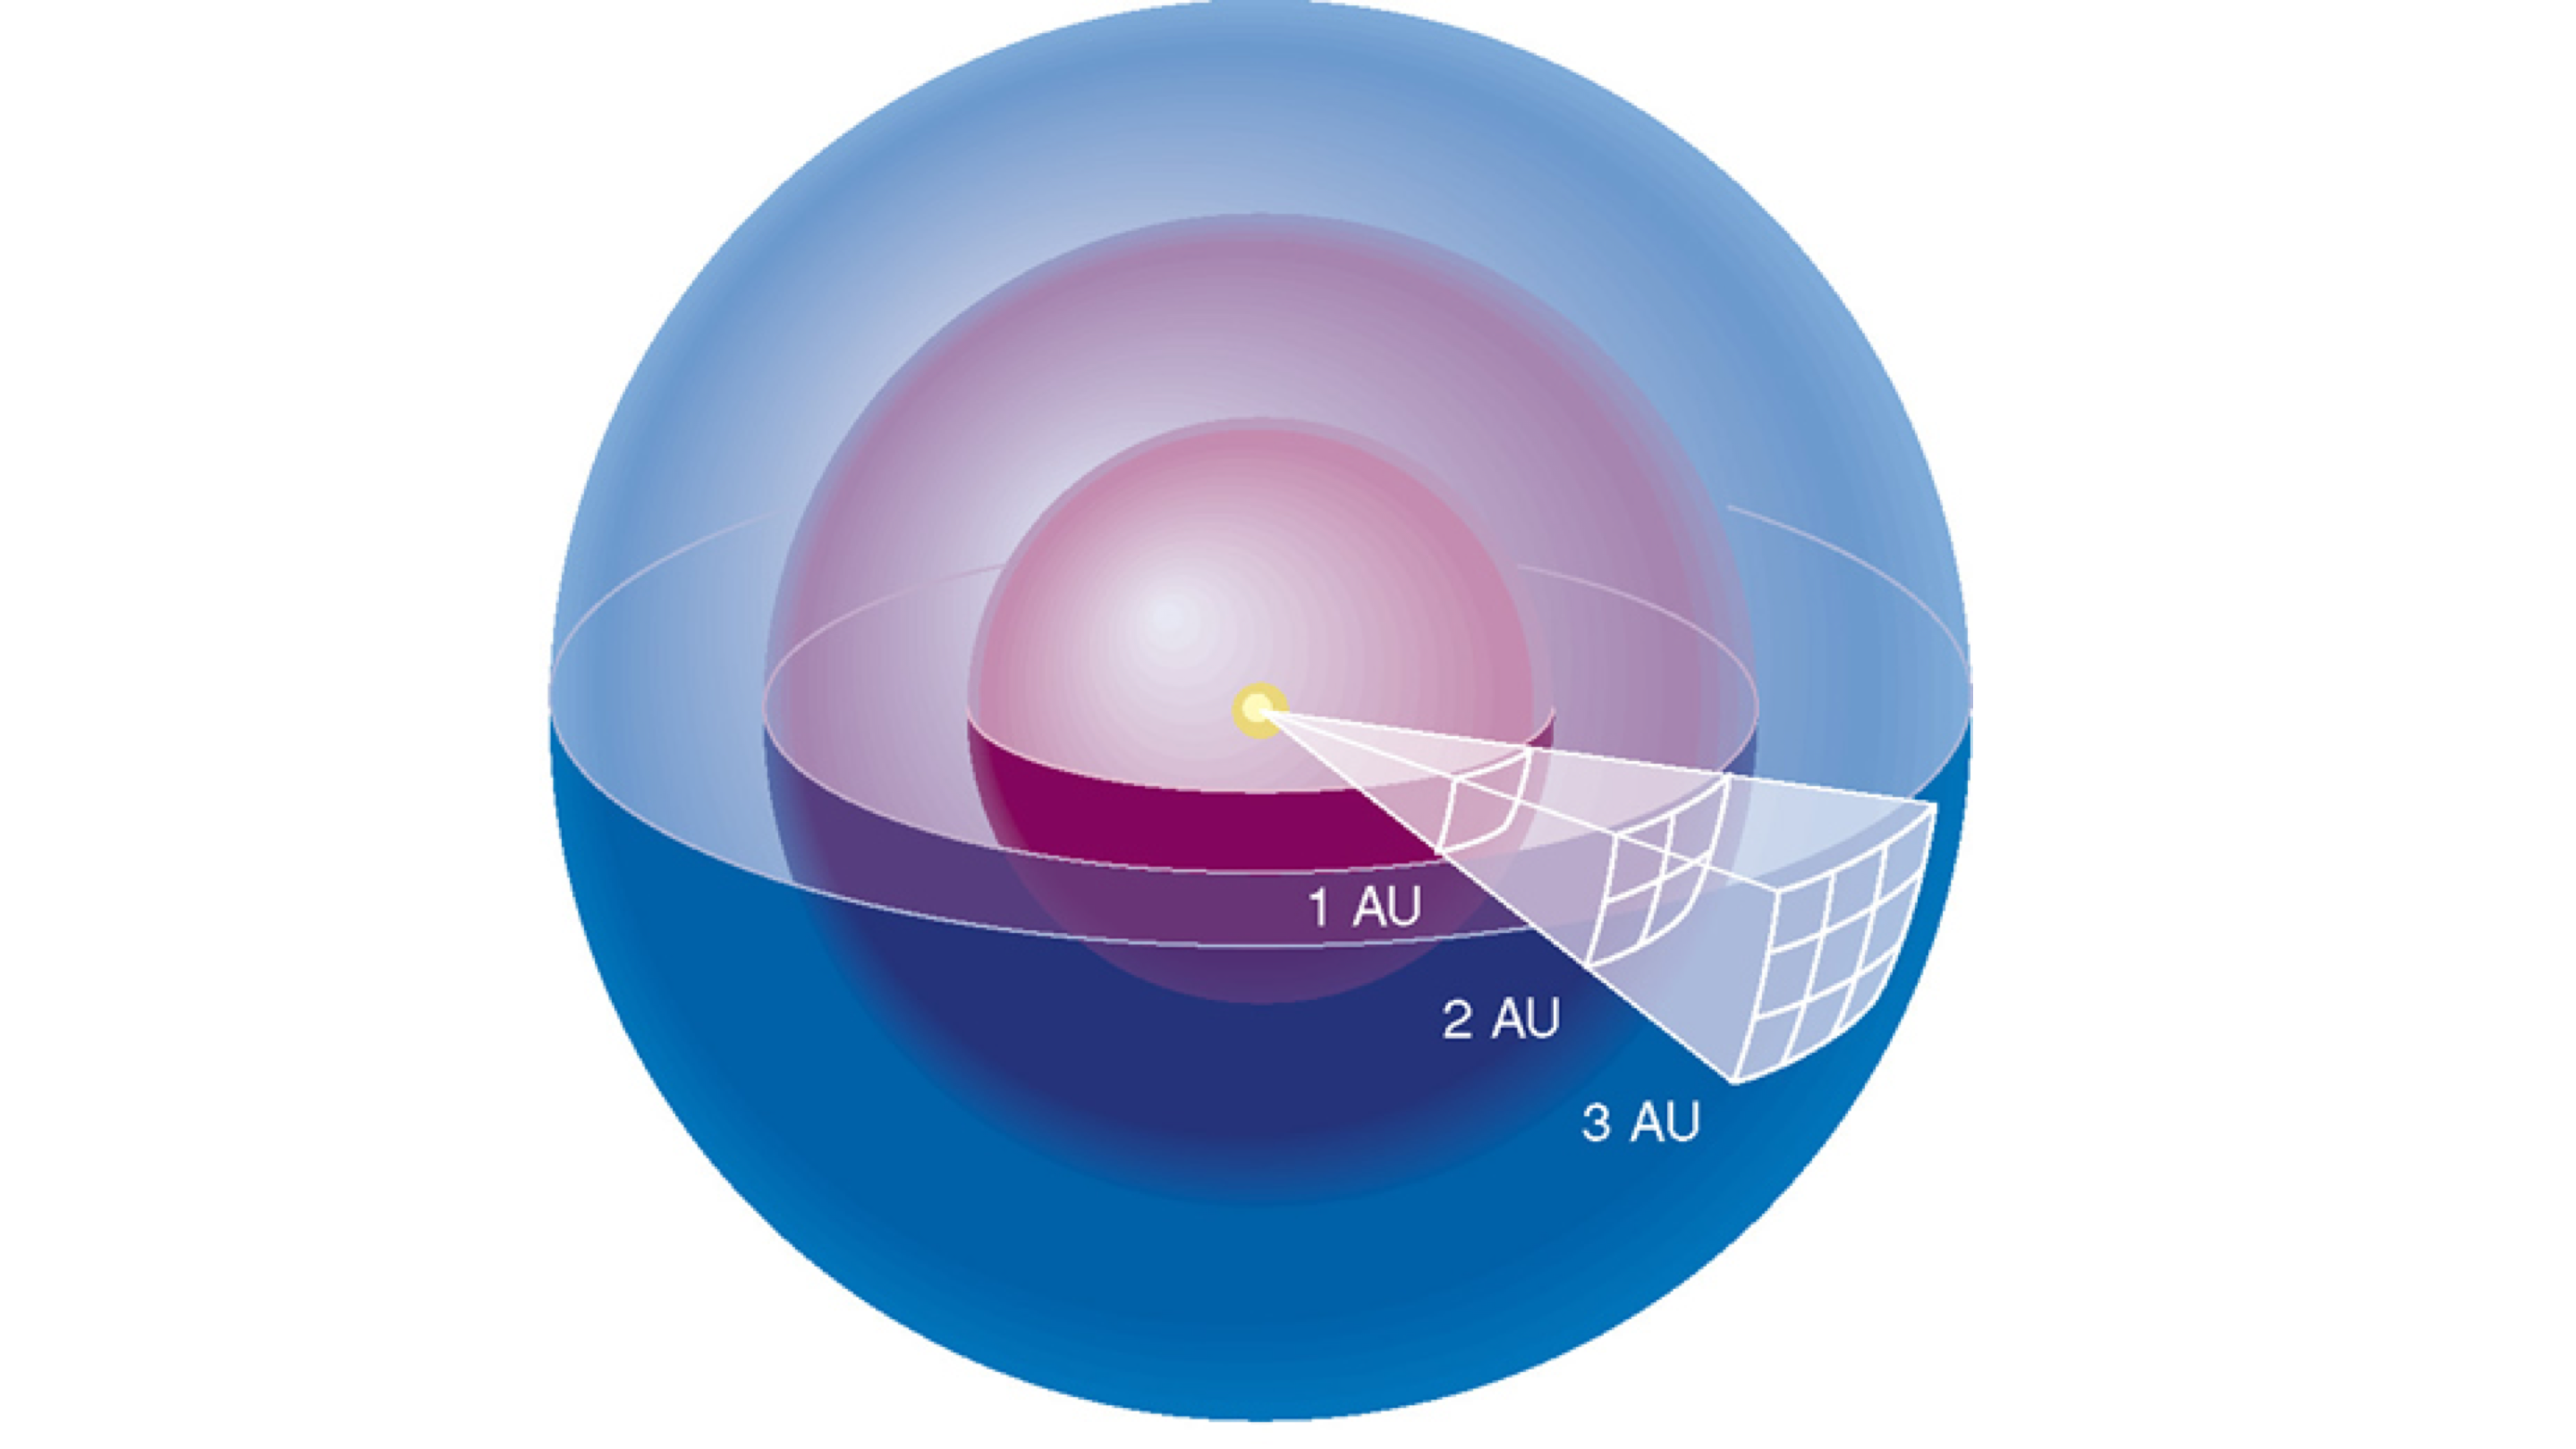

In [2]:
# Display Figure
from IPython.display import Image
Image(filename='/Users/paha3326/main/Teaching/ASTR3720/hayne/lectures/images/flux_rsquared_shells.png', width=500)

**Figure 3.3:** The "one over r-squared" law. Isotropic expansion of radiation reduces its concentration, measured as energy flux over an imaginary surface perpendicular to the direction of travel. Each square represents an equal surface area, and the beam of radiation is represented by the white rectangular cone.

---

## Thermal-radiative equilibrium

The concept of radiative equilibrium is important for estimating temperatures on planets where we have little or no direct information on their thermal state. Radiative equilibrium means that heat is gained and lost only by absorption and emission of radiation, and that the temperature is constant over some specified time interval. For example, the time interval could be one day, in which case radiative equilibrium gives an estimate of the daily average temperature.

### Planetary equilibrium (or "effective") temperature

Planetary albedo, $A$ is the fraction of incidenty sunlight on a planet that is reflected back to space. Clouds and ice increase the albedo, while darker surfaces such as the ocean surface or forest canopy decrease albedo. The absorbed fraction is $(1-A)$. By equating the absorbed sunlight to the emitted infrared radiation averaged over the whole planet, we can solve directly for the **planetary equilibrium temperature** (Fig. 3.4). This is an *average* temperature over a complete rotation (day). We have to be careful, because the area where sunlight is absorbed is one fourth the area where infrared radiation is emitted. To see this, compare the cross sectional area of the planet, $\pi R^2$ (a circular disk), to the total surface area of the (spherical) planet, $4\pi R^2$. We then have

\begin{align}
    \mathrm{(Cross~sectional~area)\times(Absorbed~solar~flux)} &= \mathrm{(Total~area)\times(Emitted~infrared~flux)} \\
    \\
    \pi R^2(1-A)F_\odot &= 4\pi R^2\sigma T_\mathrm{eq}^4 \\
    \\
    (1-A)F_\odot/4 &= \sigma T_\mathrm{eq}^4
\end{align}
Rearranging, we have the equilibrium temperature,

\begin{align}
    T_\mathrm{eq} = \left( \frac{(1-A)F_\odot}{4\sigma} \right)^{1/4}
\end{align}

The equilibrium temperature is sometimes called **effective temperature**. Note that here we have assumed 100% emissivity, $\epsilon = 1$. (How would $T_\mathrm{eq}$ change if emissivity were less than 100%?)

---

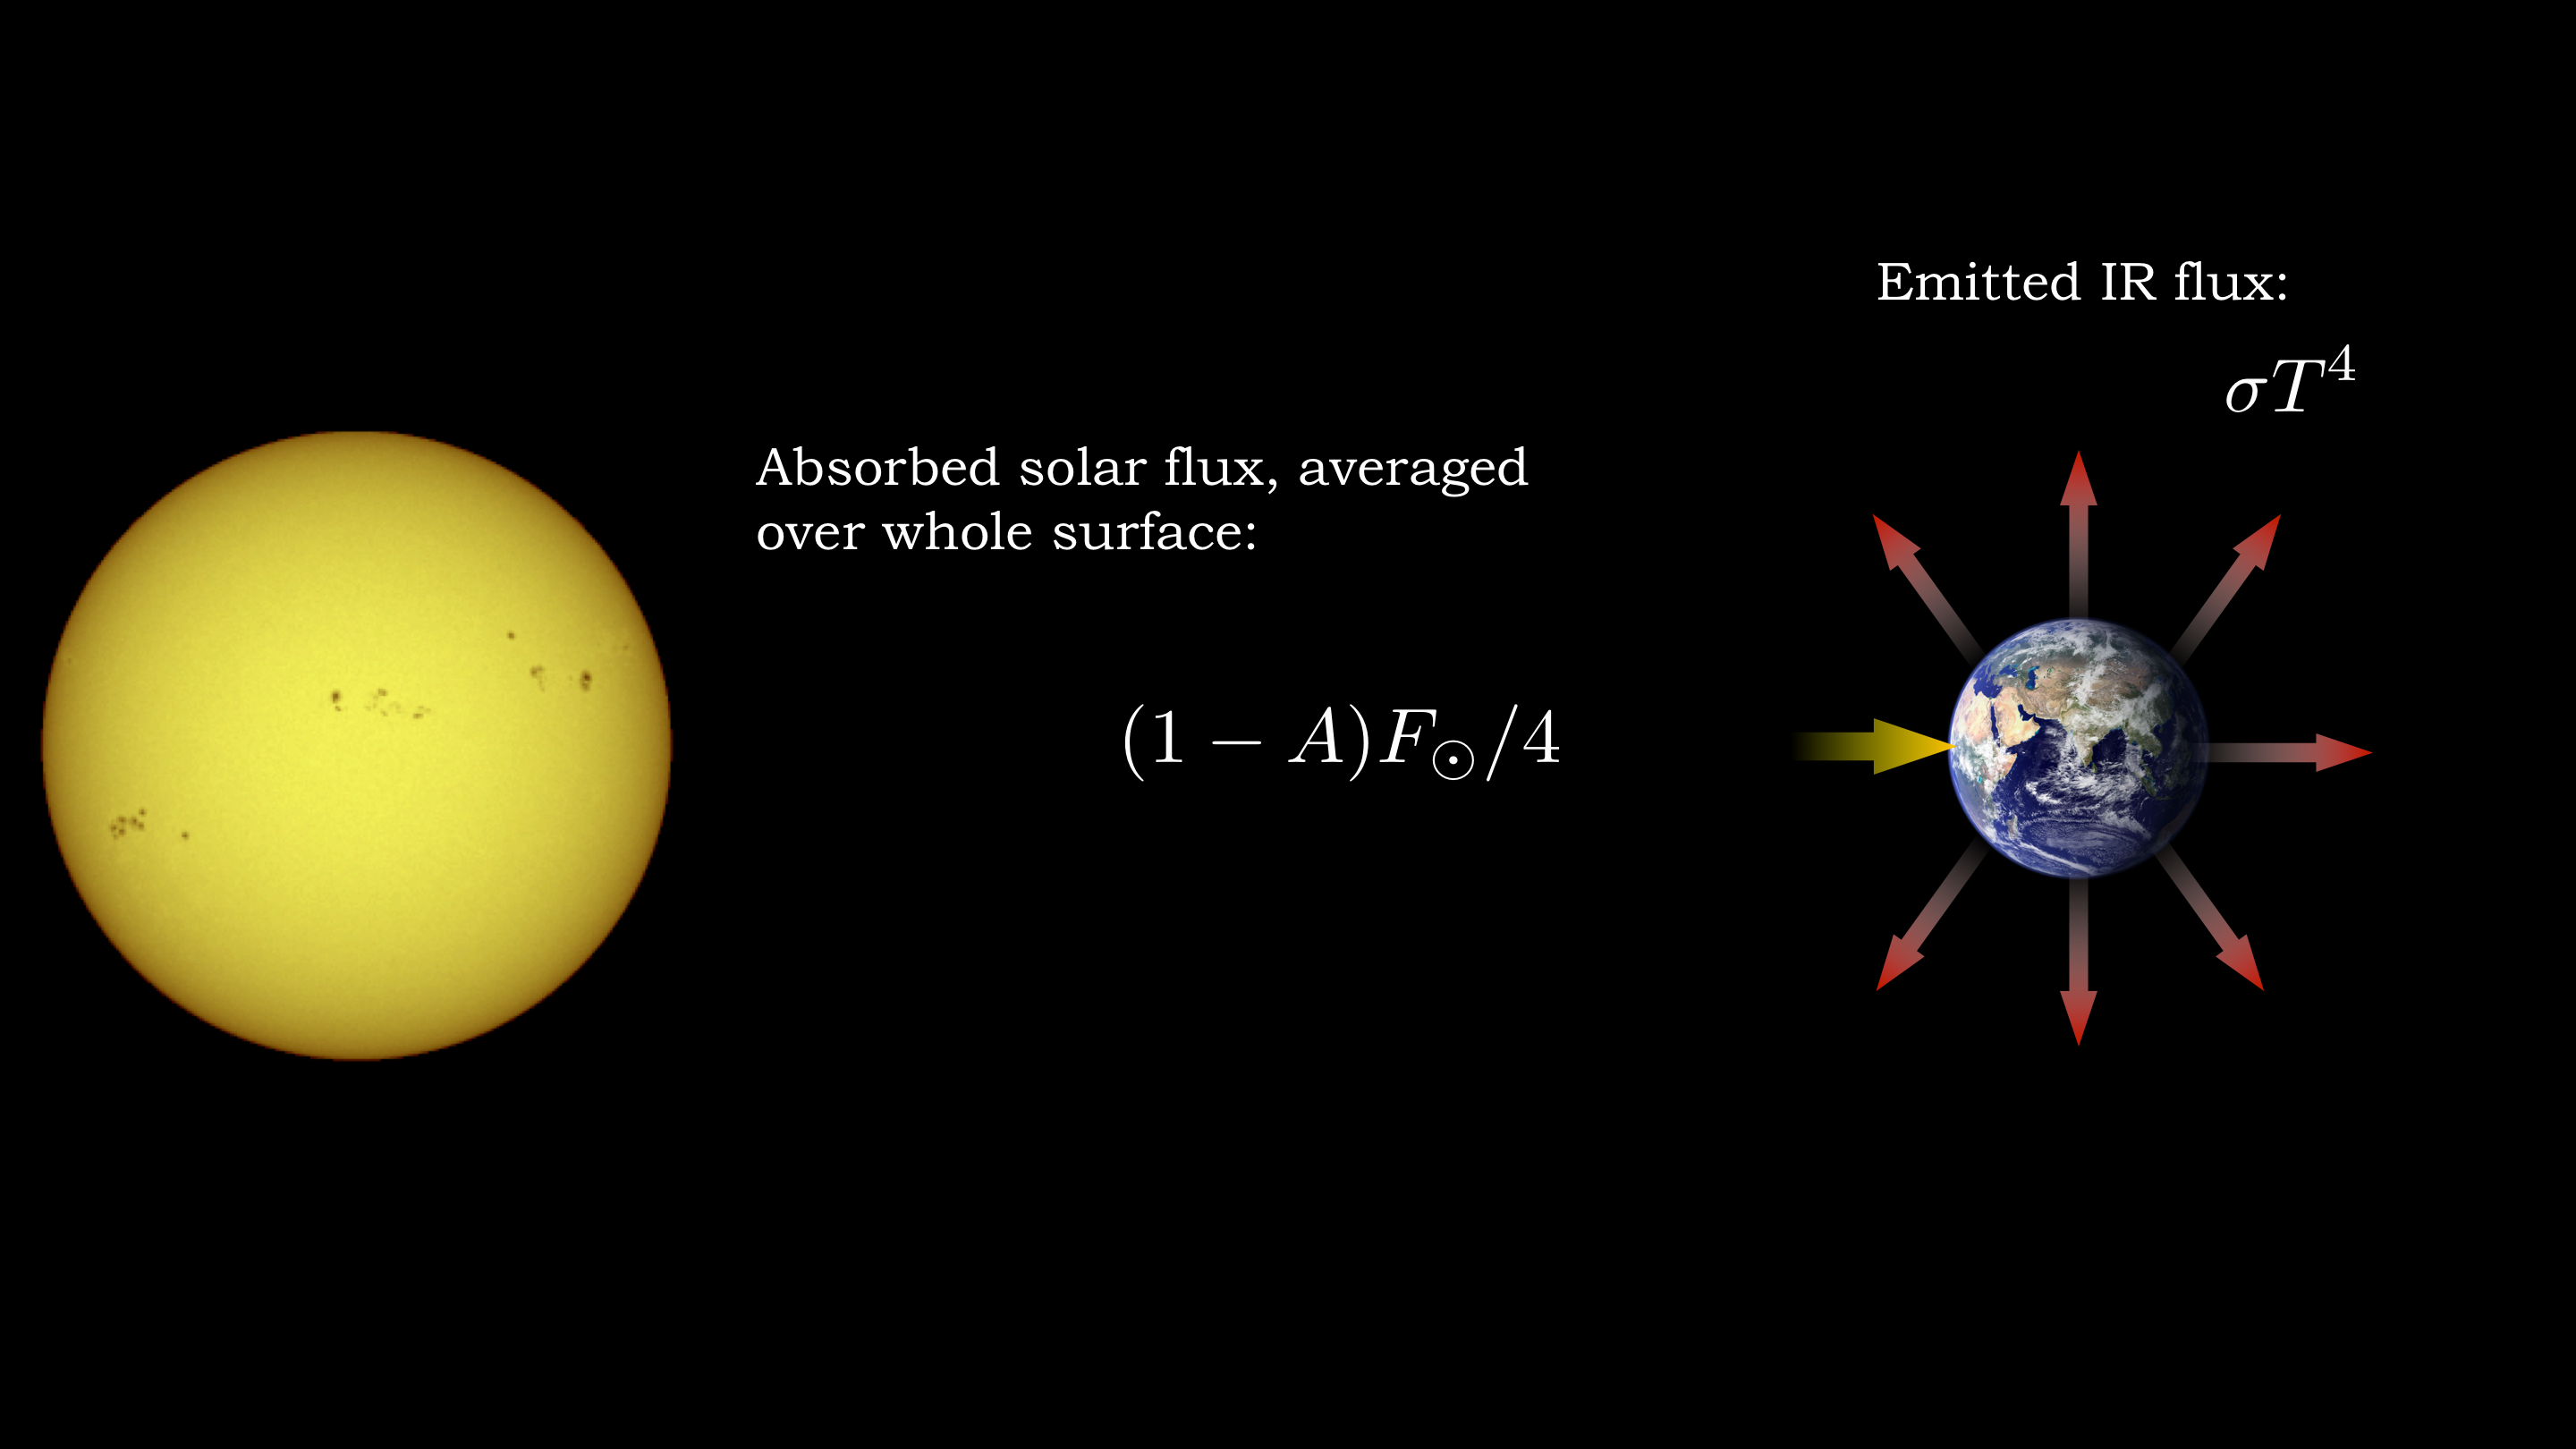

In [3]:
# Display Figure
from IPython.display import Image
Image(filename='/Users/paha3326/main/Teaching/ASTR3720/hayne/notes/radiative-equilibrium.png', width=500)

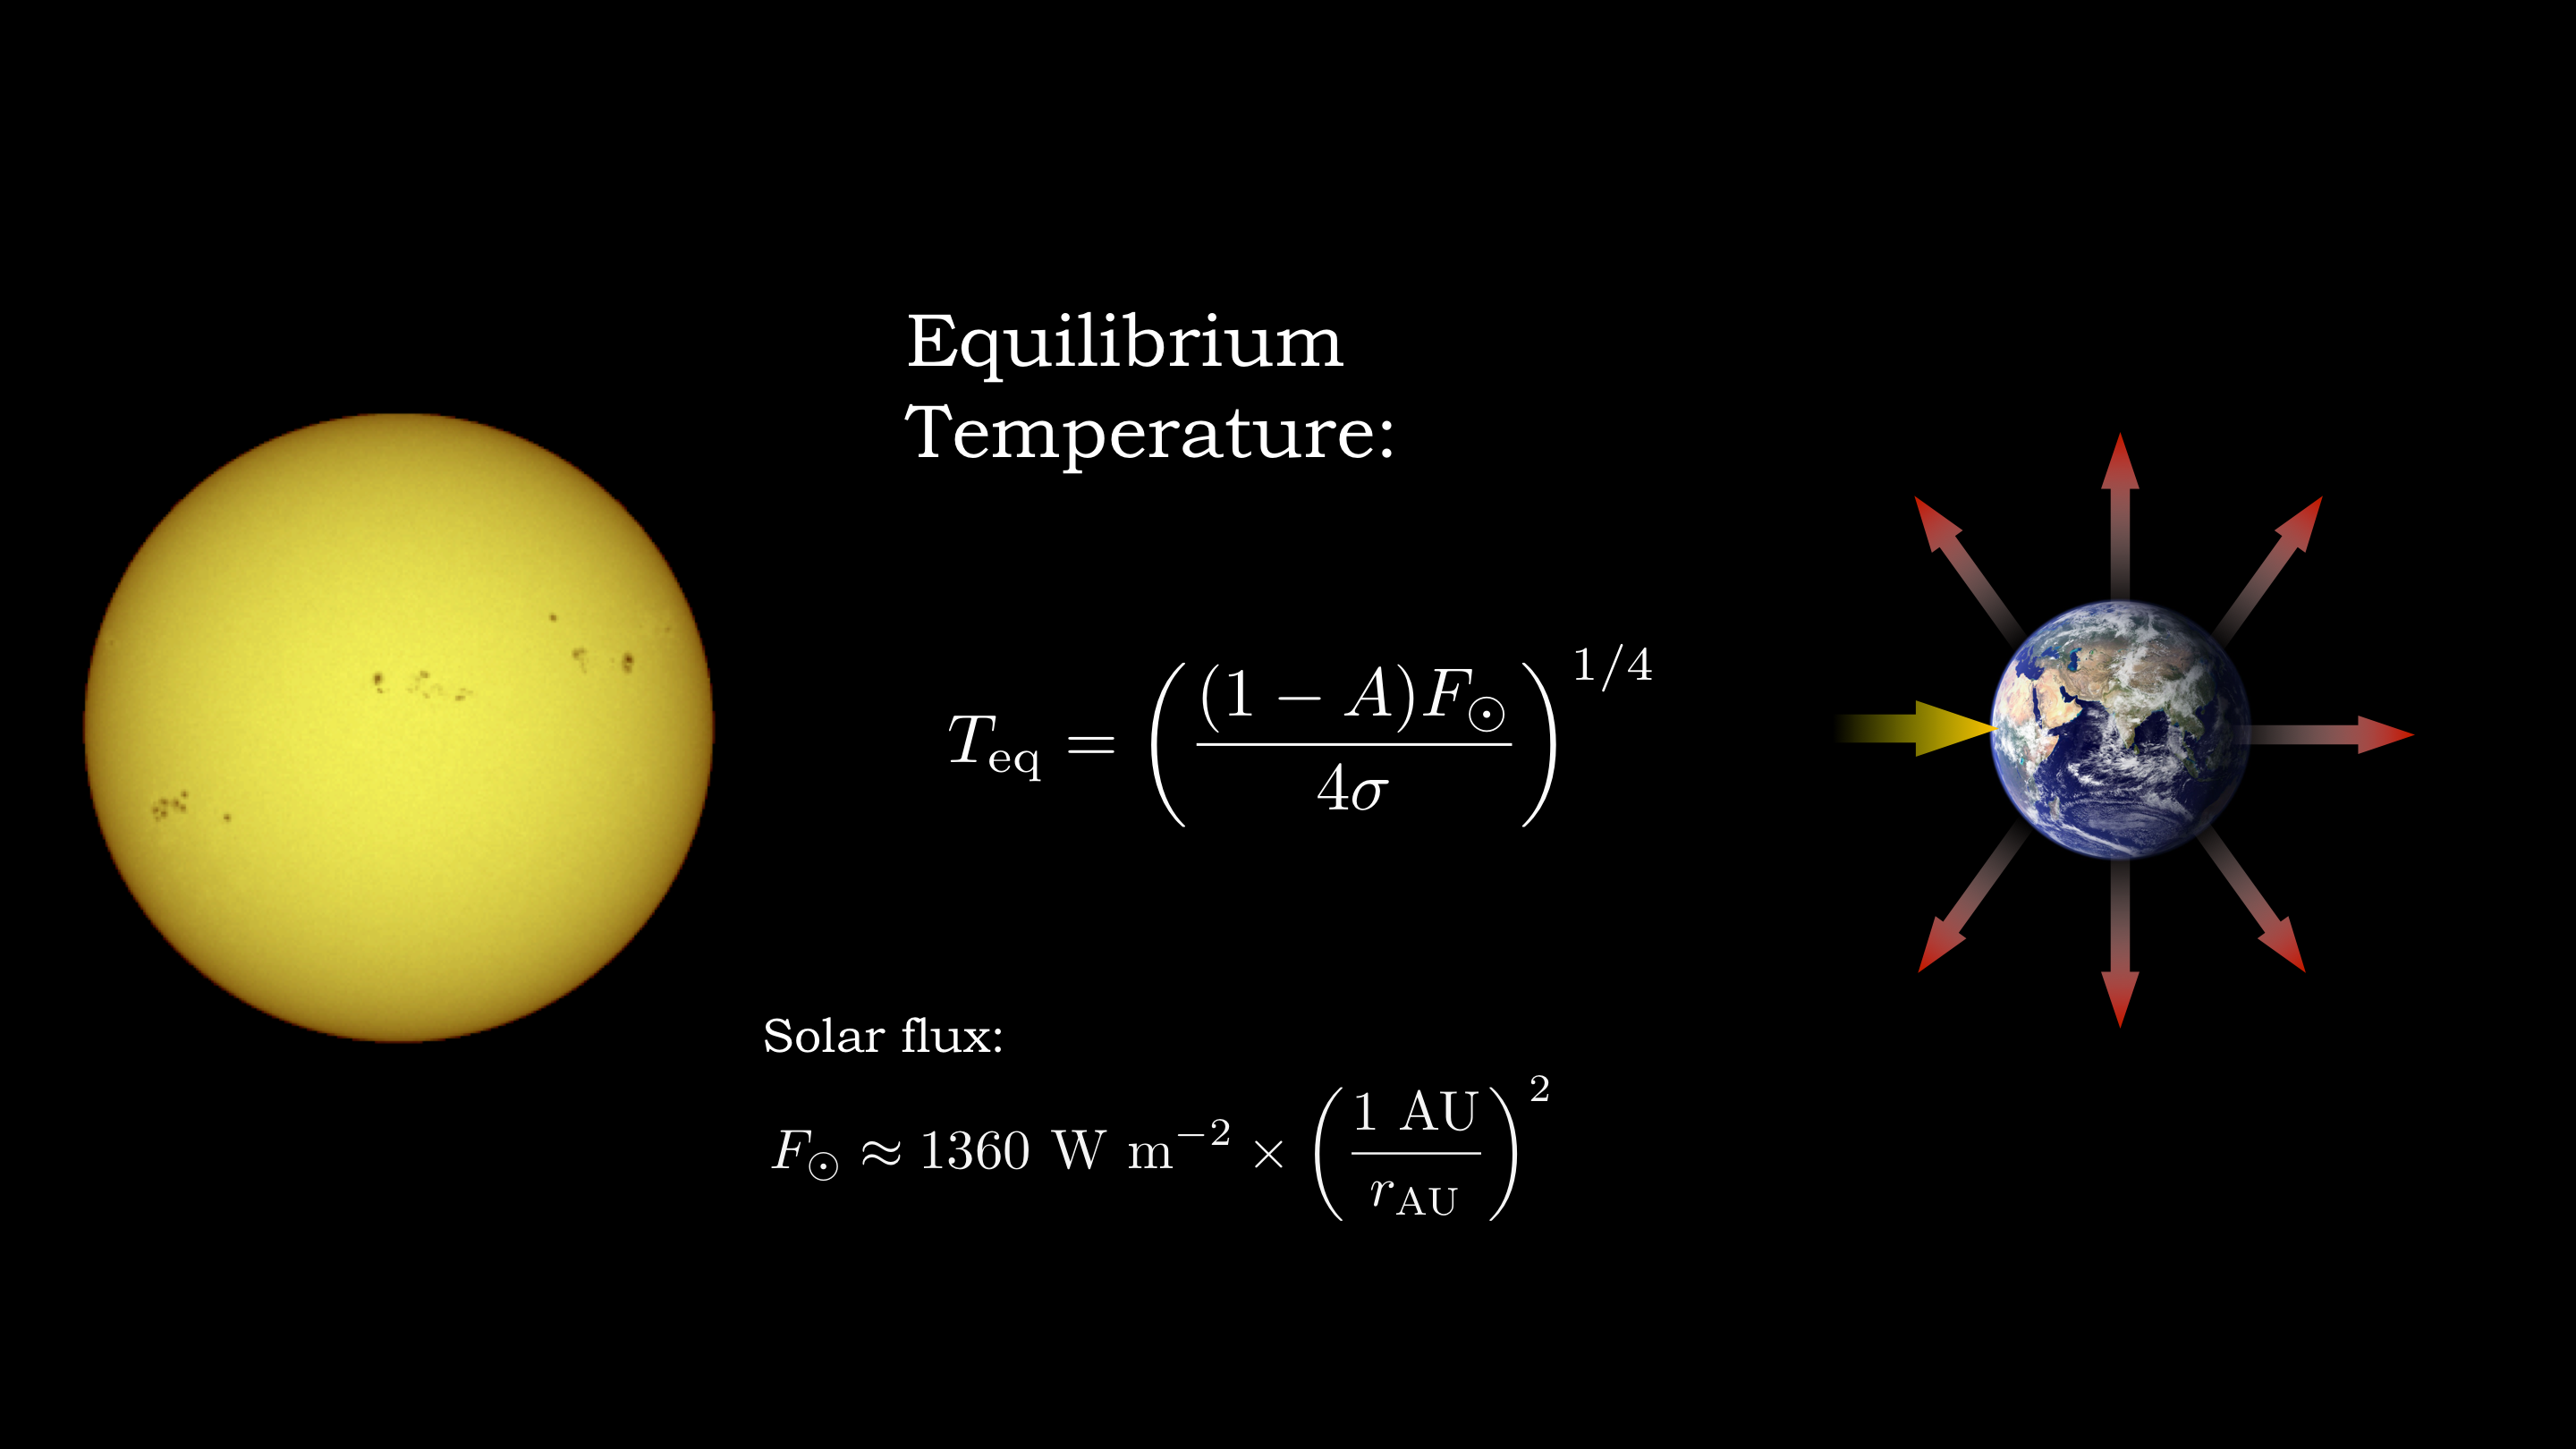

In [4]:
# Display Figure
from IPython.display import Image
Image(filename='/Users/paha3326/main/Teaching/ASTR3720/hayne/notes/equilibrium-temperature.png', width=500)

**Figure 3.4:** Absorption and emission in balance yield the radiative equilibrium temperature. If the planet emitted less energy than it absorbed, its temperature would rise until it had reached equilibrium.

---

### Equilibrium maximum temperture

By reducing the timescale, we can calculate the equilbrium *maximum* temperature. This assumes instantaneous equilibrium at the point on the planet where the sun is directly overhead. In this case, we do not average over the whole planetary surface. Instead, we equate the absorbed solar flux to the emitted infrared flux:

\begin{align}
    (1-A)F_\odot &= \sigma T_\mathrm{max}^4 \\
    \\
    \rightarrow T_\mathrm{max} &= \left( \frac{(1-A)F_\odot}{\sigma} \right)^{1/4} = \sqrt{2}T_\mathrm{eq}
\end{align}

Note that the maximum temperature assuming radiative equilibrium is higher than the equilibrium *average* temperature by a factor $4^{1/4} = \sqrt{2}$.


Although $T_\mathrm{eq}$ is a useful concept, real planets with atmospheres often have higher average surface temperatures, due to the **greenhouse effect**. For example, Venus has $T_\mathrm{eq} \approx 230~\mathrm{K}$, yet its average surface temperature remains at a scorching 740 K. We will investigate the causes of the greenhouse effect, and how to estimate its magnitude in later lectures.